In [7]:
# Cell 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import shap

# Local Computer
# from Utils import visualization as viz
# from Utils import model
# from Utils import explainer

# Google Colab
import model
import visualization as viz
import explainer

In [10]:
def load_dataset(ide="manual", file_path: str = None):
  if ide == "local":
    df = pd.read_csv("G:\My Drive\ITS\Tugas\Semester_5\Biomedical Engineering\Final Project Req\Dataset.csv")
  elif ide == "colab":
    from google.colab import drive
    drive.mount('/content/drive')
    if file_path is None:
        file_path = "/content/drive/MyDrive/ITS/Tugas/Semester_5/Biomedical Engineering/Final Project Req/Dataset.csv"
    df = pd.read_csv(file_path)
  else:
    if file_path is None:
        raise ValueError("file_path must be provided for manual ide.")
    df = pd.read_csv(file_path)

  return df

df = load_dataset(ide="colab")

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-124230704.py:3: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("G:\My Drive\ITS\Tugas\Semester_5\Biomedical Engineering\Final Project Req\Dataset.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Label Targeting and Feature Selection
label = df.columns[-1]
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_cols = [c for c in numeric_cols if c != label]

# Preparing Feature Matrix and Target Vector
X = df[feature_cols].values
y_raw = df[label].values

# Label Encoding the Target Variable
le = LabelEncoder()
y = le.fit_transform(df[label])

class_names = le.classes_

In [ ]:
# Splitting the Dataset into Training and Val-Test Sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# Further Splitting Val-Test Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                y_val_test,
                                                test_size=0.5,
                                                stratify=y_val_test,
                                                random_state=42)

In [ ]:
# Preprocessing
X_train_s, X_val_s, _, _ = model.preprocess_data(X_train, X_val)

In [ ]:
rf_model = model.train_random_forest(X_train_s, y_train)
model.evaluate(rf_model, X_val_s, y_val, class_names, "Random Forest")

Training Random Forest (Black-Box)...
--- Evaluasi Random Forest ---
Akurasi: 0.9161

Classification Report:
              precision    recall  f1-score   support

       Basal       1.00      0.95      0.98        21
        Her2       1.00      0.60      0.75        10
        LumA       0.90      0.97      0.93        65
        LumB       0.86      0.86      0.86        29
      Normal       0.94      0.94      0.94        18

    accuracy                           0.92       143
   macro avg       0.94      0.87      0.89       143
weighted avg       0.92      0.92      0.91       143



0.916083916083916

--- Menghitung SHAP (Tree)... ---
✅ Selesai.

=== Visualisasi Random Forest (Black-Box) ===
Generasi Plot Summary untuk: Basal...


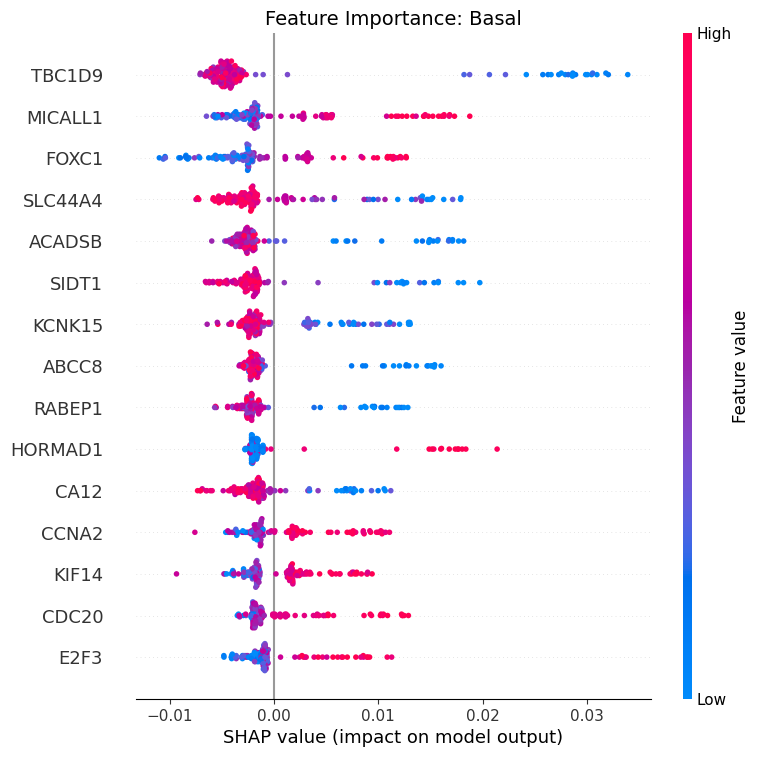

Generasi Plot Summary untuk: Her2...


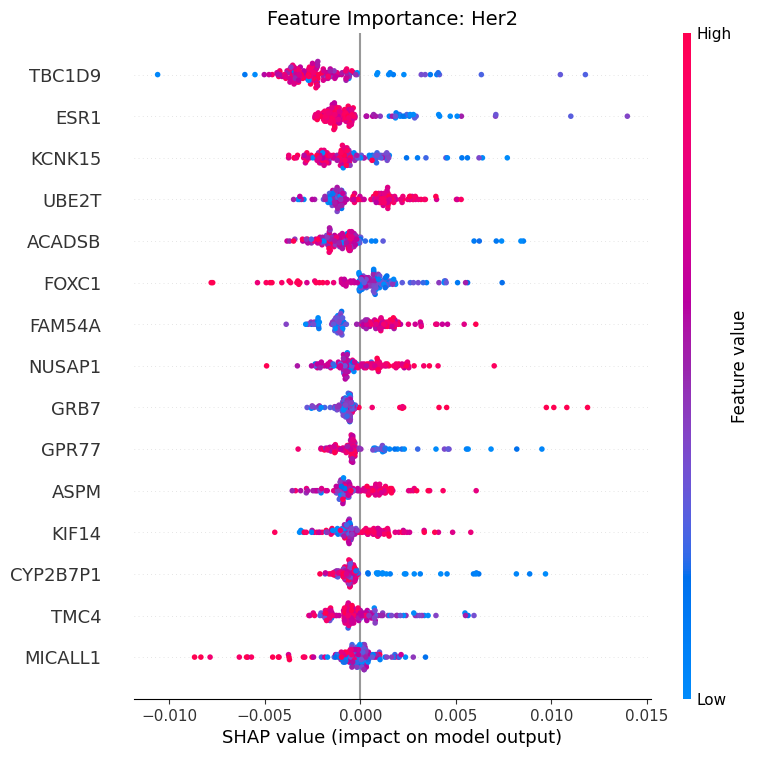

Generasi Plot Summary untuk: LumA...


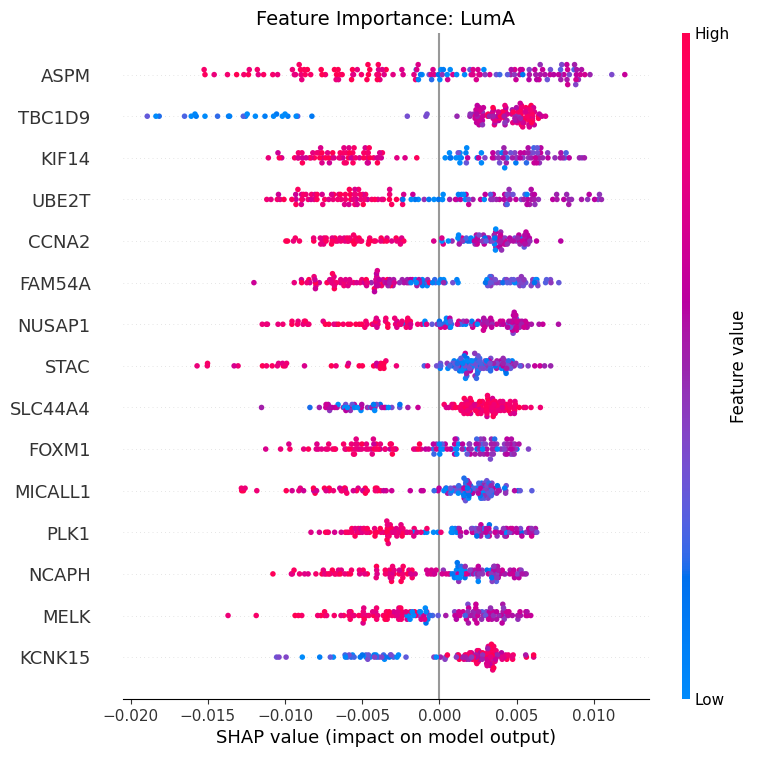

Generasi Plot Summary untuk: LumB...


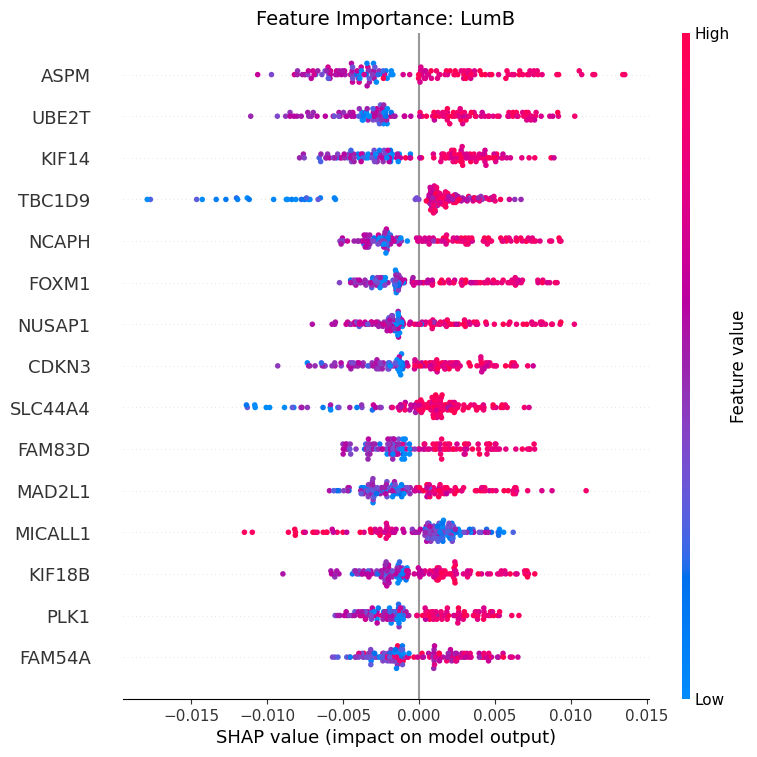

Generasi Plot Summary untuk: Normal...


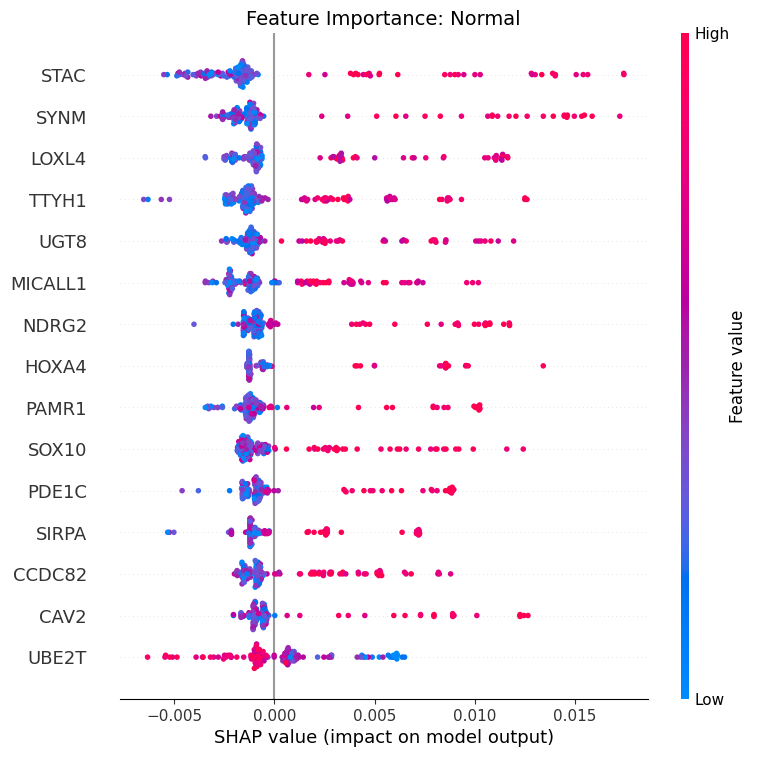

In [ ]:
explainer_rf, shap_rf = explainer.compute_shap_tree(rf_model, X_val_s)

print("\n=== Visualisasi Random Forest (Black-Box) ===")

viz.plot_beeswarm(shap_rf, X_val_s, feature_cols, class_names, target_class='all')


--- Analisis Lokal Pasien #0 (Kelas Target: Basal) ---


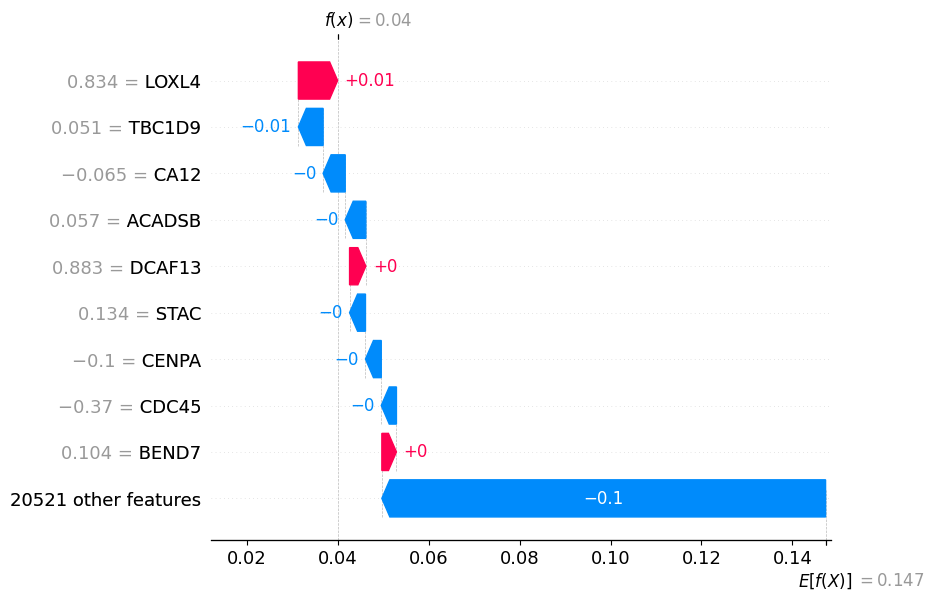

In [ ]:
viz.plot_waterfall(shap_rf, explainer_rf, X_val_s, feature_cols, class_names, sample_idx=0, class_idx=0)